<a href="https://colab.research.google.com/github/kanvesh/DataMining/blob/master/keras_to_pb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!python keras_to_tensorflow.py

In [0]:
!python keras_to_tensorflow.py --input_model="model.h5" --output_model="model.pb"

In [4]:
!pip install tensorflowjs

    100% |████████████████████████████████| 13.9MB 2.4MB/s 
    100% |████████████████████████████████| 307kB 24.1MB/s 
    100% |████████████████████████████████| 63.0MB 389kB/s 
    100% |████████████████████████████████| 51kB 17.6MB/s 
    100% |████████████████████████████████| 573kB 17.2MB/s 
    100% |████████████████████████████████| 3.0MB 11.2MB/s 
tensorflow 1.11.0 has requirement keras-applications>=1.0.5, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.11.0 has requirement keras-preprocessing>=1.0.3, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: Keras-Applications 1.0.6
    Uninstalling Keras-Applications-1.0.6:
      Successfully uninstalled Keras-Applications-1.0.6
  Found existing installation: Keras-Preprocessing 1.0.5
    Uninstalling Keras-Preprocessing-1.0.5:
      Successf

In [15]:
!pip install keras==2.2.2

  Using cached https://files.pythonhosted.org/packages/34/7d/b1dedde8af99bd82f20ed7e9697aac0597de3049b1f786aa2aac3b9bd4da/Keras-2.2.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/26/1e778ebd737032749824d5cba7dbd3b0cf9234b87ab5ec79f5f0403ca7e9/Keras_Preprocessing-1.0.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/54/90/8f327deaa37a71caddb59b7b4aaa9d4b3e90c0e76f8c2d1572005278ddc5/Keras_Applications-1.0.4-py2.py3-none-any.whl
tensorflow 1.12.0 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.12.0 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.0.5
    Uninstalling Keras-Preprocessing-1.0.5:
      Successfully uninstalled Keras-Preprocessing-1.0.5
  Found existing installation: Keras-Applications 1.0.6
    Uninstalling Keras-Applications-1.0.6:

In [16]:
!tensorflowjs_converter --input_format=keras snack_model.h5 snack_tfjs_model_new

Using TensorFlow backend.


In [10]:
!python keras_to_tensorflow.py --input_model="snack_model.h5" --output_model="snack_model_v2.pb"

Using TensorFlow backend.
I1116 04:34:43.529113 140512219236224 keras_to_tensorflow.py:130] Converted output node names are: ['dense_4/Softmax']
INFO:tensorflow:Froze 322 variables.
I1116 04:34:43.807872 140512219236224 tf_logging.py:115] Froze 322 variables.
INFO:tensorflow:Converted 322 variables to const ops.
I1116 04:34:43.994920 140512219236224 tf_logging.py:115] Converted 322 variables to const ops.
I1116 04:34:44.343299 140512219236224 keras_to_tensorflow.py:162] Saved the freezed graph at /content/snack_model_v2.pb


In [6]:
!ls

keras_to_tensorflow.py	model.pb     snack_labels.txt
model.h5		sample_data  snack_model.h5


In [17]:
!tensorflowjs_converter \
    --input_format=tf_frozen_model \
    --output_node_names='dense_4/Softmax' \
    --saved_model_tags=serve \
    snack_model_v2.pb \
    web_model

Using TensorFlow backend.
2018-11-16 04:39:43.538299: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:501] Optimization results for grappler item: graph_to_optimize
2018-11-16 04:39:43.538372: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:503]   debug_stripper: Graph size after: 882 nodes (0), 897 edges (0), time = 0.766ms.
2018-11-16 04:39:43.538388: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:503]   model_pruner: Graph size after: 560 nodes (-322), 575 edges (-322), time = 3.819ms.
2018-11-16 04:39:43.538406: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:503]   constant folding: Graph size after: 560 nodes (0), 575 edges (0), time = 99.049ms.
2018-11-16 04:39:43.538440: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:503]   arithmetic_optimizer: Graph size after: 510 nodes (-50), 575 edges (0), time = 281.426ms.
2018-11-16 04:39:43.538457: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:503]   dependency_optimizer: Graph size af

In [0]:
import tensorflow as tf
from tensorflow.python.platform import gfile
with tf.Session() as sess:
    model_filename ='snack_model.pb'
    with gfile.FastGFile(model_filename, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        g_in = tf.import_graph_def(graph_def)
LOGDIR='.'
train_writer = tf.summary.FileWriter(LOGDIR)
train_writer.add_graph(sess.graph)

In [0]:
import tensorflow as tf

def printTensors(pb_file):

    # read pb into graph_def
    with tf.gfile.GFile(pb_file, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # import graph_def
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def)

    # print operations
    for op in graph.get_operations():
        print(op.name)


printTensors("snack_model.pb")

In [13]:
!pip install tensorflowjs

    100% |████████████████████████████████| 307kB 7.1MB/s 
    100% |████████████████████████████████| 13.9MB 2.3MB/s 
    100% |████████████████████████████████| 51kB 21.7MB/s 
tensorflow 1.12.0 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.12.0 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: Keras-Preprocessing 1.0.5
    Uninstalling Keras-Preprocessing-1.0.5:
      Successfully uninstalled Keras-Preprocessing-1.0.5
  Found existing installation: Keras-Applications 1.0.6
    Uninstalling Keras-Applications-1.0.6:
      Successfully uninstalled Keras-Applications-1.0.6
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [31]:
!pip install tensorflow --upgrade

    100% |████████████████████████████████| 83.1MB 424kB/s 
    100% |████████████████████████████████| 51kB 9.5MB/s 
    100% |████████████████████████████████| 3.1MB 9.5MB/s 
tensorflowjs 0.6.5 has requirement tensorflow==1.11.0, but you'll have tensorflow 1.12.0 which is incompatible.
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.6 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.5 which is incompatible.
  Found existing installation: Keras-Applications 1.0.4
    Uninstalling Keras-Applications-1.0.4:
      Successfully uninstalled Keras-Applications-1.0.4
  Found existing installation: tensorboard 1.11.0
    Uninstalling tensorboard-1.11.0:
      Successfully uninstalled tensorboard-1.11.0
  Found existing installation: Keras-Preprocessing 1.0.2
    Uninstalling Keras-Preprocessing-1.0.2:
      Successfully uninstalled Keras-Preprocessing-1.0.2
  Found existing inst

In [0]:
import tensorflow as tf

In [34]:
tf.__version__

'1.11.0'

In [7]:
!bazel build tensorflow/python/tools:freeze_graph
!bazel-bin/tensorflow/python/tools/freeze_graph \
--input_graph=/tmp/model/my_graph.pb \
--input_checkpoint=/tmp/model/model.ckpt-1000 \
--output_graph=/tmp/frozen_graph.pb \
--output_node_names=output_node \

/bin/bash: bazel: command not found
/bin/bash: bazel-bin/tensorflow/python/tools/freeze_graph: No such file or directory


In [5]:
!bazel

/bin/bash: bazel: command not found


In [4]:
!apt-get install bazel

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package bazel


In [0]:
import keras
mod = keras.models.load_model('snack_model.h5')

In [22]:
mod.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import cv2 
from PIL import Image as PILImage
from IPython.display import Image
import urllib.request
from keras.models import Model
from scipy.spatial.distance import cosine
from keras.applications.vgg16 import VGG16
import keras
mod = keras.models.load_model('snack_model.h5')

def get_vector(image_url, model):
  urllib.request.urlretrieve(image_url,'temp_func.jpg')
  img = image.load_img('temp_func.jpg', target_size=(224, 224))
  display(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  
  return features[0]

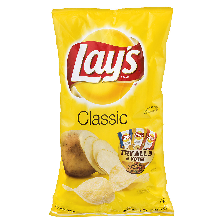

array([4.9854017e-30, 1.0000000e+00, 4.9829628e-17], dtype=float32)

In [33]:
url = 'https://pics.drugstore.com/prodimg/483808/900.jpg'
get_vector(url, mod)

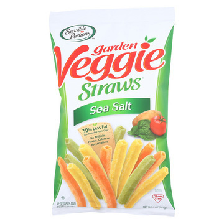

array([3.3423450e-30, 3.5289507e-17, 1.0000000e+00], dtype=float32)

In [34]:
url = 'https://lovewithfood.com/images/marketitemphotos/0001/4843/7d956ec9aa_largest.jpg'
get_vector(url, mod)

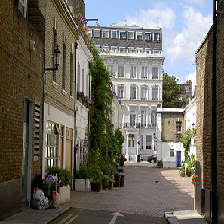

array([4.4712575e-08, 6.8875911e-06, 9.9999309e-01], dtype=float32)

In [35]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Typical_Street_In_The_Royal_Borough_Of_Kensington_And_Chelsea_In_London.jpg/375px-Typical_Street_In_The_Royal_Borough_Of_Kensington_And_Chelsea_In_London.jpg'
get_vector(url, mod)

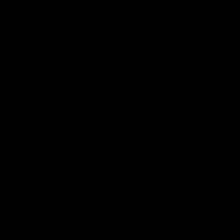

array([9.9698120e-01, 2.7934706e-03, 2.2537833e-04], dtype=float32)

In [36]:
url = 'https://static1.squarespace.com/static/5893ba7cf5e231c597ad99a4/t/5898ed42197aea8092f3945c/1486420262214/Black+Background.jpg'
get_vector(url,mod)

In [39]:
mod.layers